# Implementing a Liquid State Machine using Brian Simulator

Ricardo de Azambuja - CRNS - Plymouth University

## Abstract
A Liquid State Machine (LSM) is proved to be effective in the processing of time varying signals, since its internal states are dependent of current and past inputs. The literature has several examples of applications where the LSM framework is applied as to control robots [Joshi and Maass, “Movement Generation with Circuits of Spiking Neurons.”, Burgsteiner, “Training Networks of Biological Realistic Spiking Neurons for Real-Time Robot Control.”], music composer recognition [Pape, de Gruijl, and Wiering, “Democratic Liquid State Machines for Music Recognition.”], fingerprint identification [Elmir, Elberrichi, and Adjoudj, “Liquid State Machine Based Fingerprint Identification.”] and speech recognition [Zhang et al., “A Digital Liquid State Machine With Biologically Inspired Learning and Its Application to Speech Recognition.”]. Currently only two specialized computer programs are available to the simulation of LSMs: PCSIM [Pecevski et al., “PCSIM.”] and pyPSNN [Schliebs, Fiasché, and Kasabov, “Constructing Robust Liquid State Machines to Process Highly Variable Data Streams.”]. The first has a complicated instalation process and the second, besides being based on Brian [Goodman, “The Brian Simulator.”], utilizes an older version that can not make use of some more interesting contructions available and the source code is too big making an addaptation more costly than rewriting from zero.  
Inspired by the problems faced by the author in early tentatives to use both sofwares cited above, here was developed instead of a whole new system, the basic blocks necessary to the implementation of a LSM: connection probabilities generation and dynamical synapses. The algorithms were implemented initially in Brian version 1.4, but because of their simplicity a porting to other systems becomes an easy task.

# Usage example:

In [1]:
import numpy

In [2]:
import lsm_connections_probability as lm; # Creates the 3D Grid and the connections according to Maass 2002


In [3]:
%%capture capt
import lsm_dynamical_synapses_v1 as ls; # Creates the dynamical synapses according to Maass 2002 and using the output 
                                        # from the lsm_connections_probability

In [4]:
import plot_3d_connections as p3d # Plots the neurons and the connections (blue-> inhibitory and red->excitatory) in 3D

In [5]:
%matplotlib inline
import matplotlib
matplotlib.pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

In [6]:
Number_of_neurons_lsm = 600
Net_shape= (20,5,6) # 20x5=>layer, 6=>number of layers 
Number_of_neurons_I = 300
Net_shape_I= (10,5,6) 

In [7]:
# This is for the Liquid
lsm_3dGrid_flat = numpy.zeros(Number_of_neurons_lsm) # This creates a numpy 1D array with 'Number_of_neurons_lsm' positions
                                                     # I'm using a numpy array to be able to use the reshape method to 
                                                     # change from 1D (vector) to 3D (matrix)

In [8]:
# This is for the Input
input_3dGrid_flat = numpy.zeros(Number_of_neurons_I) # This creates a numpy 1D array with 'Number_of_neurons_lsm' positions
                                                     # I'm using a numpy array to be able to use the reshape method to 
                                                     # change from 1D (vector) to 3D (matrix)

In [9]:
l_range = range(Number_of_neurons_lsm)
inhibitory_index_L = [l_range.pop(numpy.random.randint(0,len(l_range))) for i in range(int(Number_of_neurons_lsm*0.2))] 

In [10]:
l_range = range(Number_of_neurons_I)
inhibitory_index_I = [l_range.pop(numpy.random.randint(0,len(l_range))) for i in range(int(Number_of_neurons_I*0.2))]
del l_range

In [11]:
# This is the dictionary that has all the connections parameters according to Maass 2002.
# It is necessary to create the 3D connections and the STP configuration matrixes
# E=>1 (excitatory) and I=>0 (inhibitory)
# Ex.: (0,0) => II
# Dynamical Synapses Parameters (STP):
Connections_Parameters={
				(0,0):[ # II
						0.1,   	# CGupta=0.1        # Parameter used at the connection probability - from Maass2002 paper
						0.32,  	# UMarkram=0.32     # Use (U) - Parameter used at the Dynamic Synapse - from Maass2002 paper
						0.144, 	# DMarkram=0.144    # Time constant for Depression (tau_rec) - used at the Dynamic Synapse - from Maass2002 paper					
						0.06,  	# FMarkram=0.06     # Time constant for Facilitation (tau_facil) - used at the Dynamic Synapse - from Maass2002 paper
						2.8,   	# AMaass=2.8        # (nA) In the Maass2002 paper the value is negative, but because I need a positive scale (random.normal parameter) and there is a negative sign in front of the abs function I changed this to positive
						0.8    	# Delay_trans = 0.8 # In Maass paper the transmission delay is 0.8 to II, IE and EI		
					],
				(0,1):[ # IE
						0.4,	# CGupta=0.4
						0.25,	# UMarkram=0.25
						0.7,	# DMarkram=0.7
						0.02,	# FMarkram=0.02
						3.0,	# AMaass=3.0 #in the Maass2002 paper the value is negative, but because I need a positive scale (random.normal parameter) and there is a negative sign in front of the abs function I changed this to positive
						0.8 	# Delay_trans = 0.8 # in Maass paper the transmission delay is 0.8 to II, IE and EI
					],
				(1,0):[ # EI
						0.2,	# CGupta=0.2
						0.05,	# UMarkram=0.05
						0.125,	# DMarkram=0.125
						1.2,	# FMarkram=1.2
						1.6,	# AMaass=1.6
						0.8 	# Delay_trans = 0.8 # in Maass paper the transmission delay is 0.8 to II, IE and EI
					],
				(1,1):[ # EE
						0.3,	# CGupta=0.3 
						0.5,	# UMarkram=0.5
						1.1,	# DMarkram=1.1
						0.05,	# FMarkram=0.05
						1.2,	# AMaass=1.2 #scaling parameter or absolute synaptic efficacy or weight - from Maass2002 paper
						1.5 	# Delay_trans = 1.5 # in Maass paper the transmission delay is 1.5 to EE connection
					]
				}


In [12]:
# Generate the connections matrix inside the Liquid (Liquid->Liquid) - according to Maass2002
print "Generating the Liquid->Liquid connections...",
output_L_L = lm.generate_connections(lsm_3dGrid_flat, inhibitory_index_L, Net_shape, 
                                        CParameters=Connections_Parameters, lbd=1.2) # lbd controls the connections
print "Done!"


Generating the Liquid->Liquid connections... Done!


In [13]:
# Generate the connections matrix between the Input and the Liquid (Input->Liquid) - according to Maass2002
print "Generating the Input->Liquid connections...",
# output_I_L = lm.generate_connections(input_3dGrid_flat, inhibitory_index_I, Net_shape_I, 
#                                      lsm_3dGrid_flat, inhibitory_index_L, Net_shape, 
#                                         CParameters=Connections_Parameters, lbd=3.3) # lbd controls the connections
output_I_L = lm.generate_connections(lsm_3dGrid_flat, inhibitory_index_L, Net_shape,
                                     input_3dGrid_flat, inhibitory_index_I, Net_shape_I,
                                        CParameters=Connections_Parameters, lbd=3.3) # lbd controls the connections
print "Done!"

Generating the Input->Liquid connections... Done!


Generating the 3D plot: INPUT->LIQUID... Sending back the figure object...


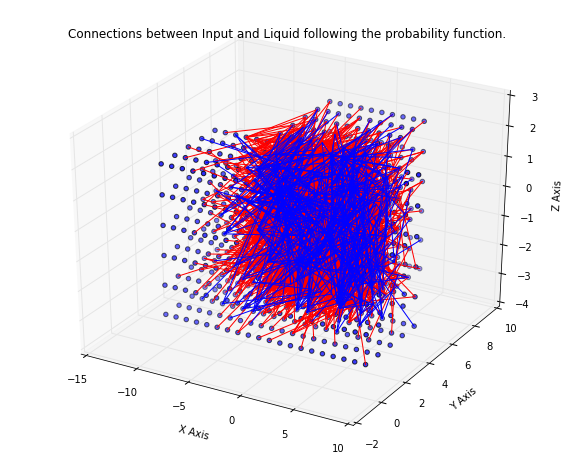

Done!


In [14]:
print "Generating the 3D plot: INPUT->LIQUID...",
# Returns the objects so it is possible to make changes if necessary:
plt,fig,ax = p3d.show_3d_connections(output_I_L, show_index=False, return_figure=True)
plt.title("Connections between Input and Liquid following the probability function.")
plt.show()
print "Done!"

Generating the 3D plot: LIQUID->LIQUID... Sending back the figure object...


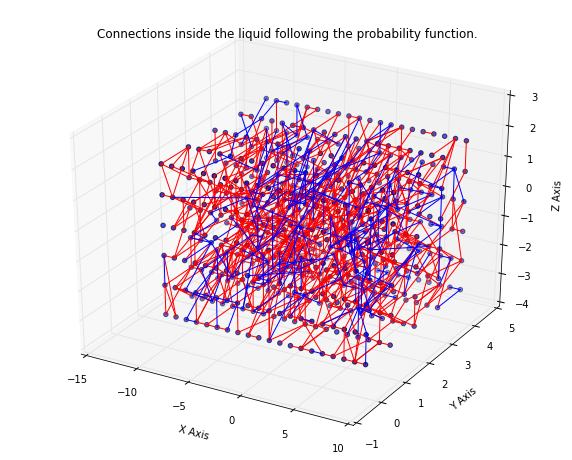

Done!


In [15]:
# # Draws the Liquid 3D grid with the connections
print "Generating the 3D plot: LIQUID->LIQUID...",
plt,fig,ax = p3d.show_3d_connections(output_L_L, show_index=False, return_figure=True)
plt.title("Connections inside the liquid following the probability function.")
plt.show()
print "Done!"

# ANNEXES

## lsm_connections_probability code

In [ ]:
%%file lsm_connections_probability.py
import numpy

# This code is NOT optimized!
# I wrote it thinking about the readability...


def euclidean_distance(pointA, pointB):
	"""	
	Calculates the Euclidean Distance between two 3D points
	pointA = tuple(x1,y1,z1)
	pointB = tuple(x2,y2,z2)
	Needs numpy as numpy!
	"""
	x1,y1,z1 = pointA
	x2,y2,z2 = pointB

	return numpy.sqrt(numpy.power((x1-x2),2)+numpy.power((y1-y2),2)+numpy.power((z1-z2),2))

def calculate_connection_probability():
	pass


def generate_connections(flattened_3DGrid_a, inhibitory_index_vector_a, Net_shape_a, flattened_3DGrid_b=None, inhibitory_index_vector_b=None, Net_shape_b=None, CParameters=None, lbd=1.2, randomstate=numpy.random.RandomState()):
	"""
	Generates the necessary data to create an 1D connected neuron network with the probabilities of the 3D connections according to Maass2002 paper.
	Normally this could be done using the pyNN.space.3DGrid, but SpiNNaker doesn't accept this. That's why it is
	necessary to flatten everything to a 1D vector in the end. Because the others simulators are not going to complain
	about the 1D connection I think it is better to keep compatibility to SpiNNaker.
	Also all the parameters with dependence to the connection type are setup in this function (according to Maass2002)

	flattened_3DGrid = numpy array
	inhibitory_index_vector = 1D vector with the index from flattened_3DGrid indicating the neuron is inhibitory
	Net_shape = tuple with the 3D shape of the neuron network (x,y,z)
	lbd = is the lambda factor from Maass paper. Controls both the average number of connections and the average distance between neurons that are synaptically connected
	CParameters = dictionary with the STP parameters to each type of connection ('II', 'IE', 'EE' and 'EI').

	It is also possible to generate connections between two groups: a and b. In this situation both groups are positioned in 
	such a way that they don't overlap and are centralized, but the system ONLY generates the connections between the two groups (no internal connections).
	This option is useful if someone wants to connect the liquid to another SNN using the same probability calculations to generate the connections.

	It returns a dictionary:
	{'exc':connections_list_exc,'inh':connections_list_inh, '3Dplot_a':positions_list_a, '3Dplot_b':positions_list_b} where
	connections_list_*:
						(
						(i,j), # PRE and POS synaptic neuron indexes (according to the input flattened_3DGrid)
						pconnection, # probability of the connection calculated
						(W_n, U_ds, D_ds, F_ds), # parameters according to Maass2002
						Delay_trans, # parameters according to Maass2002
						connection_type # tuple (A,B) where 1=>excitatory and 0=>inhibitory
						)

	positions_list_*:
	list with x,y,z tuples of the corresponding position to be used with the Euclidean Distance

	"""

	#Transforms the 1D vector in a 3D according to Net_shape using the reshape method from numpy array
	#The reshape method takes the components of the vector and fills the matrix in a sequential way.
	#Ex: [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] 
	#    Shape => (3,4,2) 
	#    Result => 
	# array([[[ 0,  1],
	#         [ 2,  3],
	#         [ 4,  5],
	#         [ 6,  7]],
	#        [[ 8,  9],
	#         [10, 11],
	#         [12, 13],
	#         [14, 15]],
	#        [[16, 17],
	#         [18, 19],
	#         [20, 21],
	#         [22, 23]]])


	
	if not (flattened_3DGrid_b is None): 
		pop_b_y_offset = Net_shape_a[1] # Translates the second population for the Y lenght of the first when they are not the same
		                                # So they are not going to overlap in the calculation of the distance or when plotting
		pop_a_y_offset = 0 # It is not necessary to translate the first population in this axis!

	else: 
	    # This is for the case where the connections ARE in the same population
		# Copy the variables from population 'a' to population 'b'
		flattened_3DGrid_b = flattened_3DGrid_a
		inhibitory_index_vector_b = inhibitory_index_vector_a
		pop_b_y_offset=0 # In this case it is not necessary a offset in Y because 'a' and 'b' are the same population!
		pop_a_y_offset=0
		Net_shape_b = Net_shape_a


	new_3dGrid_a = flattened_3DGrid_a.reshape(Net_shape_a) # Converts to a 3D shape (matrix) the 1D list of population 'a'
	new_3dGrid_b = flattened_3DGrid_b.reshape(Net_shape_b) # Converts to a 3D shape (matrix) the 1D list of population 'b'

	pop_a_x_offset = -Net_shape_a[0]/2.0   # Centralize in the x=0 axis
	pop_a_z_offset = -Net_shape_a[2]/2.0   # Centralize in the z=0 axis
	
	pop_b_x_offset = -Net_shape_b[0]/2.0   # Centralize in the x=0 axis
	pop_b_z_offset = -Net_shape_b[2]/2.0   # Centralize in the z=0 axis



	# Generates a list with x,y,z tuples of the corresponding position to be used with the Euclidean Distance
	positions_list_a = [(i+pop_a_x_offset, j+pop_a_y_offset, k+pop_a_z_offset) for i in range(new_3dGrid_a.shape[0]) for j in range(new_3dGrid_a.shape[1]) for k in range(new_3dGrid_a.shape[2])]
	positions_list_b = [(i+pop_b_x_offset, j+pop_b_y_offset, k+pop_b_z_offset) for i in range(new_3dGrid_b.shape[0]) for j in range(new_3dGrid_b.shape[1]) for k in range(new_3dGrid_b.shape[2])]


	connections_list_exc=[] # creates the list to be used to append the connection data of the excitatory neurons
	connections_list_inh=[] # creates the list to be used to append the connection data of the inhibitory neurons

	# Signalize the type of the pre and post synaptics neurons at each connection
	# 1 => excitatory
	# 0 => inhibitory
	connection_type=(None,None)

	# Go through all the neurons to apply the probability equation according to Maass2002 paper( C*exp(-D^2(a,b)/lambda^2) )
	# Also calculates the values of U, D and F (used with the dynamic synapse) and the A (the weight) according Maass2002
	# Here is explicit that there is an order from the population 'a' to the population 'b' and it is one to all connection. 
	# In the case of the liquid, both populations are the same.
	for i in range(len(flattened_3DGrid_a)):
		for j in range(len(flattened_3DGrid_b)):
			#Test to choose the right constant (from Maass paper <= Gupta paper)
			if i in inhibitory_index_vector_a:
				#INHIBITORY CONNECTIONS
				#II or IE
				if j in inhibitory_index_vector_b:
					#II
					(Tpre,Tpos)=(0,0)
					CGupta=CParameters[(Tpre,Tpos)][0] 			# Parameter used at the connection probability - from Maass2002 paper
					UMarkram=CParameters[(Tpre,Tpos)][1]     	# Use (U) - Parameter used at the Dynamic Synapse - from Maass2002 paper
					DMarkram=CParameters[(Tpre,Tpos)][2]    	# (second) Time constant for Depression (tau_rec) - used at the Dynamic Synapse - from Maass2002 paper					
					FMarkram=CParameters[(Tpre,Tpos)][3]    	# (second) Time constant for Facilitation (tau_facil) - used at the Dynamic Synapse - from Maass2002 paper
					AMaass=CParameters[(Tpre,Tpos)][4]       	# (nA) In the Maass2002 paper the value is negative, but because I need a positive scale (random.normal parameter) and there is a negative sign in front of the abs function I changed this to positive
					Delay_trans=CParameters[(Tpre,Tpos)][5] 	# (msecond) In Maass paper the transmission delay is 0.8 to II, IE and EI and 1.5 to EE


					U_ds=abs(randomstate.normal(loc=UMarkram, scale=UMarkram/2)) # Because a gaussian goes from -inf to +inf I need to keep it positive
					D_ds=abs(randomstate.normal(loc=DMarkram, scale=DMarkram/2))
					F_ds=abs(randomstate.normal(loc=FMarkram, scale=FMarkram/2))
					W_n=-abs(randomstate.normal(loc=AMaass, scale=AMaass/2)) # Because AMaass is negative (inhibitory) so is inserted the "-" here

					connection_type=(Tpre,Tpos)

				else:
					#IE
					(Tpre,Tpos)=(0,1)
					CGupta=CParameters[(Tpre,Tpos)][0] 			# Parameter used at the connection probability - from Maass2002 paper
					UMarkram=CParameters[(Tpre,Tpos)][1]     	# Use (U) - Parameter used at the Dynamic Synapse - from Maass2002 paper
					DMarkram=CParameters[(Tpre,Tpos)][2]    	# Time constant for Depression (tau_rec) - used at the Dynamic Synapse - from Maass2002 paper					
					FMarkram=CParameters[(Tpre,Tpos)][3]    	# Time constant for Facilitation (tau_facil) - used at the Dynamic Synapse - from Maass2002 paper
					AMaass=CParameters[(Tpre,Tpos)][4]       	# (nA) In the Maass2002 paper the value is negative, but because I need a positive scale (random.normal parameter) and there is a negative sign in front of the abs function I changed this to positive
					Delay_trans=CParameters[(Tpre,Tpos)][5] 	# In Maass paper the transmission delay is 0.8 to II, IE and EI and 1.5 to EE


					U_ds=abs(randomstate.normal(loc=UMarkram, scale=UMarkram/2))
					D_ds=abs(randomstate.normal(loc=DMarkram, scale=DMarkram/2))
					F_ds=abs(randomstate.normal(loc=FMarkram, scale=FMarkram/2))
					W_n=-abs(randomstate.normal(loc=AMaass, scale=AMaass/2)) # Because AMaass is negative (inhibitory) so is inserted the "-" here
					
					connection_type=(Tpre,Tpos)

			#EXCITATORY CONNECTIONS
			elif j in inhibitory_index_vector_a:
				#EI
				(Tpre,Tpos)=(1,0)
				CGupta=CParameters[(Tpre,Tpos)][0] 			# Parameter used at the connection probability - from Maass2002 paper
				UMarkram=CParameters[(Tpre,Tpos)][1]     	# Use (U) - Parameter used at the Dynamic Synapse - from Maass2002 paper
				DMarkram=CParameters[(Tpre,Tpos)][2]    	# Time constant for Depression (tau_rec) - used at the Dynamic Synapse - from Maass2002 paper					
				FMarkram=CParameters[(Tpre,Tpos)][3]    	# Time constant for Facilitation (tau_facil) - used at the Dynamic Synapse - from Maass2002 paper
				AMaass=CParameters[(Tpre,Tpos)][4]       	# (nA) In the Maass2002 paper the value is negative, but because I need a positive scale (random.normal parameter) and there is a negative sign in front of the abs function I changed this to positive
				Delay_trans=CParameters[(Tpre,Tpos)][5] 	# In Maass paper the transmission delay is 0.8 to II, IE and EI and 1.5 to EE


				U_ds=abs(randomstate.normal(loc=UMarkram, scale=UMarkram/2))
				D_ds=abs(randomstate.normal(loc=DMarkram, scale=DMarkram/2))
				F_ds=abs(randomstate.normal(loc=FMarkram, scale=FMarkram/2))
				W_n=abs(randomstate.normal(loc=AMaass, scale=AMaass/2))			
				
				connection_type=(Tpre,Tpos)

			else:
				# EE
				(Tpre,Tpos)=(1,1)
				CGupta=CParameters[(Tpre,Tpos)][0] 			# Parameter used at the connection probability - from Maass2002 paper
				UMarkram=CParameters[(Tpre,Tpos)][1]     	# Use (U) - Parameter used at the Dynamic Synapse - from Maass2002 paper
				DMarkram=CParameters[(Tpre,Tpos)][2]    	# Time constant for Depression (tau_rec) - used at the Dynamic Synapse - from Maass2002 paper					
				FMarkram=CParameters[(Tpre,Tpos)][3]    	# Time constant for Facilitation (tau_facil) - used at the Dynamic Synapse - from Maass2002 paper
				AMaass=CParameters[(Tpre,Tpos)][4]       	# (nA) In the Maass2002 paper the value is negative, but because I need a positive scale (random.normal parameter) and there is a negative sign in front of the abs function I changed this to positive
				Delay_trans=CParameters[(Tpre,Tpos)][5] 	# In Maass paper the transmission delay is 0.8 to II, IE and EI and 1.5 to EE


				U_ds=abs(randomstate.normal(loc=UMarkram, scale=UMarkram/2))
				D_ds=abs(randomstate.normal(loc=DMarkram, scale=DMarkram/2))
				F_ds=abs(randomstate.normal(loc=FMarkram, scale=FMarkram/2))
				W_n=abs(randomstate.normal(loc=AMaass, scale=AMaass/2))

				connection_type=(Tpre,Tpos)

			# Calculate the probability of a connection to occur according to Maass2002 paper
			pconnection=CGupta*numpy.exp(
						-numpy.power(
							euclidean_distance(
								positions_list_a[i],
								positions_list_b[j]
								)
							,2) / numpy.power(lbd,2)
						)

			# According to the probability "pconnection", sets "connected" to zero or one
			if randomstate.random_sample() <= pconnection:
				connected=1
			else:
				connected=0


			# Generates the list with the information about the connections
			if connected:
				if connection_type[0]==0: #if IX (inhibitory connection)
					connections_list_inh.append(
						(
						(i,j), # PRE and POS synaptic neuron indexes
						pconnection, # probability of the connection
						(W_n, U_ds, D_ds, F_ds), # parameters according to Maass2002
						Delay_trans, # parameters according to Maass2002
						connection_type
						)
					)
				else: #if EX (excitatory connection)
					connections_list_exc.append(
						(
						(i,j),
						pconnection,
						(W_n, U_ds, D_ds, F_ds), 
						Delay_trans,
						connection_type
						)
					)

	return {'exc':connections_list_exc,'inh':connections_list_inh, '3Dplot_a':positions_list_a, '3Dplot_b':positions_list_b}

##lsm_dynamical_synapses_v1 code

In [ ]:
%%file lsm_dynamical_synapses_v1
# -*- coding: utf-8 -*-

import brian
import numpy

# This code was written for Brian 1.4.x
# I've never tried it with the Brian 2.x

class LsmConnections(object):

    """
    Generate the synapses (connections) according to Maass 2002 paper
    LsmConnections(brian_neuron_group, output_from_lsm_module)

    create_synapses(synapse_type)
    synapse_type => 'exc' or 'inh'
    'exc' => EE and EI
    'inh' => II and IE

    """

    def __init__(self, pop_lsm_a, pop_lsm_b, output, **xtra):
        self.pop_lsm_a = pop_lsm_a
        self.pop_lsm_b = pop_lsm_b
        self.output = output
        self.sim_clock = brian.defaultclock
        self.nostp = False

        if xtra:
            for k in xtra:
                if k=="clock":
                    self.sim_clock = xtra["clock"]
                    print "Using supplied clock..."

                if k=="nostp":
                    self.nostp=xtra["nostp"]


    def create_synapses(self, synapse_type):
        #
        # Creates the connections (Synapse object) among the neurons in the liquid
        #

        self.syn_type = synapse_type

        # synapse_type = 'exc'
        # EXCITATORY (PRE) TO ANYTHING (POST) => ie+=w*u*x (what defines if it is a Excitatory or Inhibitory connection 
        # is the place where it is connected - ie or ii)
        # EE and IE connection types

        # synapse_type = 'inh'
        # INHIBITORY (PRE) TO ANYTHING (POST) => ii+=w*u*x (what defines if it is a Excitatory or Inhibitory connection 
        # is the place where it is connected - ie or ii)
        # IE and II connection types        

        # STP equation from: 
        # http://www.briansimulator.org/docs/synapses.html
        # http://www.briansimulator.org/docs/examples-synapses_short_term_plasticity.html
        # In this part is selected the right synapse equation according to the type of the connection (see comments above)
        # The ONLY difference between the EXCITATORY AND THE INHIBITORY is where the weight is injected: ie or ii
        if self.syn_type=='exc' and not self.nostp:
                model_eq='''x : 1
                            u : 1
                            w : 1
                            tauf : 1
                            taud : 1
                            U : 1
                            '''
                pre_eq='''u=U+(u-U)*numpy.exp(-(t-lastupdate)/tauf)
                          x=1+(x-1)*numpy.exp(-(t-lastupdate)/taud)
                          ie+=w*u*x
                          x*=(1-u)
                          u+=U*(1-u)'''

        elif self.syn_type=='exc' and self.nostp:
                model_eq='''w : 1'''
                pre_eq='''ie+=w'''
                # pre_eq='''v+=w/c_m'''

        elif self.syn_type=='inh' and not self.nostp:
                model_eq='''x : 1
                            u : 1
                            w : 1
                            tauf : 1
                            taud : 1
                            U : 1
                            '''            
                pre_eq='''u=U+(u-U)*numpy.exp(-(t-lastupdate)/tauf)
                          x=1+(x-1)*numpy.exp(-(t-lastupdate)/taud)
                          ii+=w*u*x
                          x*=(1-u)
                          u+=U*(1-u)'''

        elif self.syn_type=='inh' and self.nostp:
                model_eq='''w : 1'''
                pre_eq='''ii+=w'''
                # pre_eq='''v+=w/c_m'''
        
        self.syn_lsm=brian.Synapses(self.pop_lsm_a,self.pop_lsm_b,
                   model=model_eq,
                   pre=pre_eq,
                   clock=self.sim_clock)


        # Sets the synapses according to the probability function (Maass 2002 - lsm_module.py)
        # NOT OPTMIZED!!!
        # Caution about creation of synapses:
        # 1) there is no deletion
        # 2) synapses are added, not replaced (e.g. S[1,2]=True;S[1,2]=True creates 2 synapses)

        self.w_syn=[] # list to store the Weights (w) in the same order as the creation of the synapses
        self.U_syn=[] # list to store the Use (U) in the same order as the creation of the synapses
        self.taud_syn=[] # list to store the Time constant for Depression (taud) in the same order as the creation of the synapses
        self.tauf_syn=[] # list to store the Time constant for Facilitation (tauf) in the same order as the creation of the synapses
        self.d_syn=[] # list to store the Delay (D) in the same order as the creation of the synapses


        # This part goes through all the connections (EE, EI, II and IE) but sets only the ones that start according to 'synapse_type'
        for i in xrange(len(self.output[self.syn_type])):
            
            ipre,ipos = self.output[self.syn_type][i][0] # sets the position of the neurons
            self.syn_lsm[ipre,ipos] = True # here is where the synapse is really created

            # It is extremely important to append this values at the same order the synapses (connections) are created otherwise they will not match the right synapse!!!!!!
            self.w_syn.append(self.output[self.syn_type][i][2][0]) # sets the value of the Weight (w) for this connection
            self.U_syn.append(self.output[self.syn_type][i][2][1]) # sets the value of the Use (U) for this connection
            self.taud_syn.append(self.output[self.syn_type][i][2][2]) # sets the value of the Time constant for Depression (taud) for this connection
            self.tauf_syn.append(self.output[self.syn_type][i][2][3]) # sets the value of the Time constant for Facilitation (tauf) for this connection
            self.d_syn.append(self.output[self.syn_type][i][3]) # sets the value of the Delay (D) for this connection

        # The output[self.syn_type] is organized like this:
        #     (i,j), # PRE and POS synaptic neuron indexes (this is not the same thing as the position in the 3D Grid)
        #     pconnection, # probability of the connection (according to the Maass 2002 equation)
        #     (W_n, U_ds, D_ds, F_ds), # parameters according to Maass2002
        #     Delay_trans, # parameters according to Maass2002
        #     connection_type

        # What is the order of these vectors below in relation to the synapses connections????
        # THESE VECTORS SEEM TO FOLLOW THE SAME ORDER AS THE CREATION OF THE SYNAPSES
        # BUT I COULDN'T FIND ANY OFFICIAL INFORMATION ABOUT THAT
        # => NEED TO BE CHECKED BETTER IN THE BRIAN SIMULATOR SOURCE CODE!!! 
        self.syn_lsm.taud=numpy.array(self.taud_syn)*brian.ms
        self.syn_lsm.tauf=numpy.array(self.tauf_syn)*brian.ms
        self.syn_lsm.U=numpy.array(self.U_syn)
        self.syn_lsm.w=numpy.array(self.w_syn)*brian.nA
        self.syn_lsm.delay=numpy.array(self.d_syn)*brian.ms

        self.syn_lsm.u=numpy.array(self.U_syn) # Considering u<=U at the initialization

        self.syn_lsm.x=1 # In Joshi thesis he uses u1=U and x1=1 (x1 is the R1 in his thesis)

        # from: http://www.scholarpedia.org/article/Short-term_synaptic_plasticity
        # In the model proposed by Tsodyks and Markram (Tsodyks 98), the STD effect is 
        # modeled by a normalized variable x (0≤x≤1), denoting the fraction of resources 
        # that remain available after neurotransmitter depletion. The STF effect is modeled 
        # by a utilization parameter u, representing the fraction of available resources ready 
        # for use (release probability). Following a spike, (i) u increases due to spike-induced 
        # calcium influx to the presynaptic terminal, after which (ii) a fraction u of available 
        # resources is consumed to produce the post-synaptic current. Between spikes, u decays 
        # back to zero with time constant τf and x recovers to 1 with time constant τd.
        #
        # In general, an STD-dominated synapse favors information transfer for low firing rates, 
        # since high-frequency spikes rapidly deactivate the synapse
        # 
        # Since STP has a much longer time scale than that of single neuron dynamics (the latter is typically 
        # in the time order of 10−20 milliseconds), a new feature STP can bring to the network dynamics is 
        # prolongation of neural responses to a transient input.
        # 
        # The interplay between the dynamics of u and x determines whether the joint effect of ux is dominated by 
        # depression or facilitation. In the parameter regime of τd≫τf and large U, an initial spike incurs a large 
        # drop in x that takes a long time to recover; therefore the synapse is STD-dominated (Fig.1B). 
        # In the regime of τf≫τd and small U, the synaptic efficacy is increased gradually by spikes, and consequently 
        # the synapse is STF-dominated (Fig.1C). This phenomenological model successfully reproduces the kinetic 
        # dynamics of depressed and facilitated synapses observed in many cortical areas.

        return self.syn_lsm

##plot_3d_connections code

In [ ]:
%%file plot_3d_connections.py
# Generate the points to the 3D Scatter plot

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


def show_3d_connections(output, show_index=False, show_coord=False, show_blocked=True, return_figure=False):
		'''
		Prints the neurons and the connections between them using the output from lsm_connections_probability module.
		output->is the output from the generate_liquid_connections function (from lsm_connections_probability.py)
		show_number=True->shows the index number of each neuron according to the Neurongroup
		show_blocked=True->makes the show() command block the execution of the rest of the code
		'''

		if output['3Dplot_a']==output['3Dplot_b']: # It means population 'a' and 'b' are the same!
			Neuron3DMatrix=output['3Dplot_a']
		else:
			Neuron3DMatrix=output['3Dplot_a']+output['3Dplot_b'] # This works here because they are two LISTS and "NOT" NUMPY ARRAYS.

		# Position of the neurons in the 3D space
		x=[i[0] for i in Neuron3DMatrix] 
		y=[i[1] for i in Neuron3DMatrix]
		z=[i[2] for i in Neuron3DMatrix]


		# List of tuples with (pre synaptic, post synaptic) EXCITATORY->ANYTHING neurons connections indexes
		exc_connect_positions=[output['exc'][i][0] for i in range(len(output['exc']))]

		exc_connect_positions_pre=[output['3Dplot_a'][i[0]] for i in exc_connect_positions]
		exc_connect_positions_post=[output['3Dplot_b'][i[1]] for i in exc_connect_positions]

		# List of tuples with (pre synaptic, post synaptic) INHIBITORY->ANYTHING neurons connections indexes
		inh_connect_positions=[output['inh'][i][0] for i in range(len(output['inh']))]
		inh_connect_positions_pre=[output['3Dplot_a'][i[0]] for i in inh_connect_positions]
		inh_connect_positions_post=[output['3Dplot_b'][i[1]] for i in inh_connect_positions]


		fig = plt.figure() # creates the figure for the following plots
		ax = fig.add_subplot(111, projection='3d') # setup to only one

		ax.scatter(x, y, z) # plots the points correnponding to the neurons

		# Insert a label with the position of each neuron according to the positions_list (NeuronGroup)
		if show_index:
			n=0
			for t in Neuron3DMatrix:
				ax.text(t[0], t[1], t[2], "["+str(n)+"]")
				n+=1	

		# Insert a label with the 3D coordinate used to calculate the connection probabilities
		if show_coord:
			n=0
			for t in Neuron3DMatrix:
				ax.text(t[0], t[1], t[2], str(t)+"="+str(n)) # to insert also the coordinates of the point
				n+=1

		#
		# Draw a 3D vector (arrow)
		# from matplotlib.patches import FancyArrowPatch
		# from mpl_toolkits.mplot3d import proj3d

		# class Arrow3D(FancyArrowPatch):
		#     def __init__(self, xs, ys, zs, *args, **kwargs):
		#         FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
		#         self._verts3d = xs, ys, zs

		#     def draw(self, renderer):
		#         xs3d, ys3d, zs3d = self._verts3d
		#         xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
		#         self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
		#         FancyArrowPatch.draw(self, renderer)


		# # Plot the EXCITATORY connections
		# for i in range(len(exc_connect_positions)):
		# 	a = Arrow3D(
		# 		[ exc_connect_positions_pre[i][0], exc_connect_positions_post[i][0] ], 
		# 		[ exc_connect_positions_pre[i][1], exc_connect_positions_post[i][1] ], 
		# 		[ exc_connect_positions_pre[i][2], exc_connect_positions_post[i][2] ], 
		# 		label='excitatory connections', mutation_scale=20, lw=1, arrowstyle="-|>", color="r")
		# 	ax.add_artist(a)

		# Plot the EXCITATORY connections - FAST VERSION WITHOUT ARROWS
		for i in range(len(exc_connect_positions)):
			ax.plot(
				[ exc_connect_positions_pre[i][0], exc_connect_positions_post[i][0] ], 
				[ exc_connect_positions_pre[i][1], exc_connect_positions_post[i][1] ], 
				[ exc_connect_positions_pre[i][2], exc_connect_positions_post[i][2] ], 
				label='excitatory connections', color='#FF0000')

		# # Plot the INHIBITORY connections
		# for i in range(len(inh_connect_positions)):
		# 	a = Arrow3D(
		# 		[ inh_connect_positions_pre[i][0], inh_connect_positions_post[i][0] ], 
		# 		[ inh_connect_positions_pre[i][1], inh_connect_positions_post[i][1] ], 
		# 		[ inh_connect_positions_pre[i][2], inh_connect_positions_post[i][2] ], 
		# 		label='inhibitory connections', mutation_scale=20, lw=1, arrowstyle="-|>", color="b")
		# 	ax.add_artist(a)

		# Plot the INHIBITORY connections - FAST VERSION WITHOUT ARROWS
		for i in range(len(inh_connect_positions)):
			ax.plot(
				[ inh_connect_positions_pre[i][0], inh_connect_positions_post[i][0] ], 
				[ inh_connect_positions_pre[i][1], inh_connect_positions_post[i][1] ], 
				[ inh_connect_positions_pre[i][2], inh_connect_positions_post[i][2] ], 
				label='inhibitory connections', color='#0000FF')



		ax.set_xlabel('X Axis')
		ax.set_ylabel('Y Axis')
		ax.set_zlabel('Z Axis')

		if return_figure:
			print "Sending back the figure object..."
			return plt,fig,ax
		else:
			print "Showing the figure!"
			if show_blocked:
				plt.show(block=show_blocked)
			else:
				plt.show()
